In [21]:
#234567890#234567890#234567890#234567890#234567890#234567890#234567890#234567890
#!pip install scikit-bio
import skbio
from skbio import DistanceMatrix, DNA, SubstitutionMatrix
from skbio.alignment import pair_align_nucl, pair_align_prot, TabularMSA
from skbio.sequence.distance import hamming

skbio.__version__

'0.7.1.post1'

In [2]:
DATA = '../../data'

# Basic Sequence Types

In [3]:
seqs = []
# DNA here, but RNA, Protein also possible
for seq in skbio.io.read(f'{DATA}/il6.ffn', format='fasta', constructor=DNA):
    seqs.append(seq)

In [4]:
human = seqs[0]
human

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 639
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 50.23%
---------------------------------------------------------------------
0   ATGAACTCCT TCTCCACAAG CGCCTTCGGT CCAGTTGCCT TCTCCCTGGG GCTGCTCCTG
60  GTGTTGCCTG CTGCCTTCCC TGCCCCAGTA CCCCCAGGAG AAGATTCCAA AGATGTAGCC
...
540 GCACAGAACC AGTGGCTGCA GGACATGACA ACTCATCTCA TTCTGCGCAG CTTTAAGGAG
600 TTCCTGCAGT CCAGCCTGAG GGCTCTTCGG CAAATGTAG

In [5]:
mouse = seqs[1]
mouse

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'mouse'
Stats:
    length: 636
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 41.35%
---------------------------------------------------------------------
0   ATGAAGTTCC TCTCTGCAAG AGACTTCCAT CCAGTTGCCT TCTTGGGACT GATGCTGGTG
60  ACAACCACGG CCTTCCCTAC TTCACAAGTC CGGAGAGGAG ACTTCACAGA GGATACCACT
...
540 CAGAAGGAGT GGCTAAGGAC CAAGACCATC CAATTCATCT TGAAATCACT TGAAGAATTT
600 CTAAAAGTCA CTTTGAGATC TACTCGGCAA ACCTAG

In [6]:
human._bytes[:100]  # stored as numpy array of 8-bit ints

array([65, 84, 71, 65, 65, 67, 84, 67, 67, 84, 84, 67, 84, 67, 67, 65, 67,
       65, 65, 71, 67, 71, 67, 67, 84, 84, 67, 71, 71, 84, 67, 67, 65, 71,
       84, 84, 71, 67, 67, 84, 84, 67, 84, 67, 67, 67, 84, 71, 71, 71, 71,
       67, 84, 71, 67, 84, 67, 67, 84, 71, 71, 84, 71, 84, 84, 71, 67, 67,
       84, 71, 67, 84, 71, 67, 67, 84, 84, 67, 67, 67, 84, 71, 67, 67, 67,
       67, 65, 71, 84, 65, 67, 67, 67, 67, 67, 65, 71, 71, 65, 71],
      dtype=uint8)

In [7]:
human.reverse_complement()

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 639
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 50.23%
---------------------------------------------------------------------
0   CTACATTTGC CGAAGAGCCC TCAGGCTGGA CTGCAGGAAC TCCTTAAAGC TGCGCAGAAT
60  GAGATGAGTT GTCATGTCCT GCAGCCACTG GTTCTGTGCC TGCAGCTTCG TCAGCAGGCT
...
540 TCCTGGGGGT ACTGGGGCAG GGAAGGCAGC AGGCAACACC AGGAGCAGCC CCAGGGAGAA
600 GGCAACTGGA CCGAAGGCGC TTGTGGAGAA GGAGTTCAT

In [8]:
human.transcribe()

RNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 639
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 50.23%
---------------------------------------------------------------------
0   AUGAACUCCU UCUCCACAAG CGCCUUCGGU CCAGUUGCCU UCUCCCUGGG GCUGCUCCUG
60  GUGUUGCCUG CUGCCUUCCC UGCCCCAGUA CCCCCAGGAG AAGAUUCCAA AGAUGUAGCC
...
540 GCACAGAACC AGUGGCUGCA GGACAUGACA ACUCAUCUCA UUCUGCGCAG CUUUAAGGAG
600 UUCCUGCAGU CCAGCCUGAG GGCUCUUCGG CAAAUGUAG

In [9]:
human.translate()

Protein
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 213
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   MNSFSTSAFG PVAFSLGLLL VLPAAFPAPV PPGEDSKDVA APHRQPLTSS ERIDKQIRYI
60  LDGISALRKE TCNKSNMCES SKEALAENNL NLPKMAEKDG CFQSGFNEET CLVKIITGLL
120 EFEVYLEYLQ NRFESSEEQA RAVQMSTKVL IQFLQKKAKN LDAITTPDPT TNASLLTKLQ
180 AQNQWLQDMT THLILRSFKE FLQSSLRALR QM*

# Pairwise Alignment

In [10]:
res = pair_align_nucl(human, mouse)
res.score

66.0

In [11]:
path = res.paths[0]
path

<PairAlignPath, positions: 654, segments: 45, CIGAR: '43M3D88M1I6M1D12M2I4...'>

In [12]:
msa = TabularMSA.from_path_seqs(res.paths[0], (human, mouse))
msa

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 654
-----------------------------------------------------------------------
ATGAACTCCTTCTCCACAAGCGCCTTCGGTCCA ... CAGTCCAGCCTGAGGGCTCTTCGGCAAATGTAG
ATGAAGTTCCTCTCTGCAAGAGACTTCCATCCA ... AAGTC-ACTTTGAGATCTACTCGGCAAACCTAG

## Alignment Path

In [13]:
path.lengths

array([ 43,   3,  88,   1,   6,   1,  12,   2,   4,   2,   6,   3,  50,
         3,  10,   1,   8,   2, 155,   1,   9,   1,  10,   2,   3,   1,
        16,   1,   3,   1,  88,   1,   5,   1,  27,   1,   5,   1,  23,
         2,   2,   1,  21,   1,  27])

In [14]:
path.lengths.sum()

np.int64(654)

In [15]:
path.states

array([[0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1,
        0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2,
        0]], dtype=uint8)

In [16]:
path.to_cigar()

'43M3D88M1I6M1D12M2I4M2D6M3D50M3I10M1D8M2D155M1D9M1I10M2I3M1I16M1D3M1I88M1I5M1D27M1D5M1I23M2I2M1D21M1D27M'

## Substitution Matrix

In [17]:
sm = SubstitutionMatrix.by_name('BLOSUM62')

In [18]:
prots = human.translate(), mouse.translate()
score, paths, _ = pair_align_prot(*prots, sub_score=sm)
score

415.0

In [19]:
msa = TabularMSA.from_path_seqs(paths[0], prots)
msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 214
-----------------------------------------------------------------------
MNSFSTSAFGPVAFSLGLLLVLPAAFPAPVPPG ... AQNQWLQDMTTHLILRSFKEFLQSSLRALRQM*
MKFLSARDFHPVAF-LGLMLVTTTAFPTSQVRR ... SQKEWLRTKTIQFILKSLEEFLKVTLRSTRQT*

# Multiple Alignment

In [20]:
prots = [seq.translate() for seq in seqs]
names = ('human', 'mouse', 'rat', 'chicken', 'pig', 'chimp', 'monkey')
prot_dict = {name: seq for name, seq in zip(names, prots)}
prot_dict['pig']

Protein
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'pig'
Stats:
    length: 213
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   MNSLSTSAFS PVAFSLGLLL VMATAFPTPG RLEEDAKGDA TSDKMLFTSP DKTEELIKYI
60  LGKISAMRKE MCEKYEKCEN SKEVLAENNL NLPKMAEKDG CFQSGFNQET CLMRITTGLV
120 EFQIYLDYLQ KEYESNKGNV EAVQISTKAL IQTLRQKGKN PDKATTPNPT TNAGLLDKLQ
180 SQNEWMKNTK IILILRSLED FLQFSLRAIR IM*

## Distance Matrix

In [22]:
def align_dist(seq1, seq2):
    res = pair_align_prot(seq1, seq2, sub_score=sm)
    msa = TabularMSA.from_path_seqs(res.paths[0], (seq1, seq2))
    return hamming(*msa)

In [23]:
dm = DistanceMatrix.from_iterable(prots, align_dist, key='id', validate=False)
dm

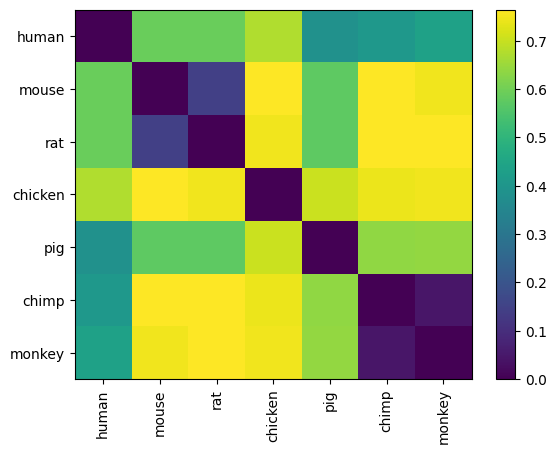

In [24]:
dm.plot();